In [1]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt

In [2]:
file_id = '1CuGOZfGt2nMVM-70_QBHdUbabQzL6jCL'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'AmazonPurchases.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1CuGOZfGt2nMVM-70_QBHdUbabQzL6jCL
From (redirected): https://drive.google.com/uc?id=1CuGOZfGt2nMVM-70_QBHdUbabQzL6jCL&confirm=t&uuid=e32a9fda-ff69-471c-ba11-f044f627b484
To: /content/AmazonPurchases.csv
100%|██████████| 351M/351M [00:07<00:00, 49.0MB/s]


'AmazonPurchases.csv'

In [3]:
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases = purchases[purchases['Order Date'] < '2022-12-31']

purchases.head(10)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care
5,2019-02-18,10.99,1,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,R_01vNIayewjIIKMF,Computer & Accessories
6,2019-02-18,4.99,1,NJ,Amazon Basics USB 2.0 Charger Cable - A-Male t...,B00NH13S44,R_01vNIayewjIIKMF,Computer & Accessories
7,2019-03-15,124.99,1,NJ,"Fire HD 8 Tablet (8"" HD Display, 32 GB, withou...",B077H6L7T9,R_01vNIayewjIIKMF,Electronics
8,2019-04-23,12.99,1,NJ,"Men's Leather Belt, Ratchet Dress Belt with Au...",B07L84ZZXC,R_01vNIayewjIIKMF,"Clothing, Shoes and Jewellery"
9,2019-04-23,24.69,1,NJ,NaN,B06XKNWJN2,R_01vNIayewjIIKMF,NaN


In [4]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['year'] = purchases['Order Date'].dt.year
purchases['day_of_year'] = purchases['Order Date'].dt.day_of_year

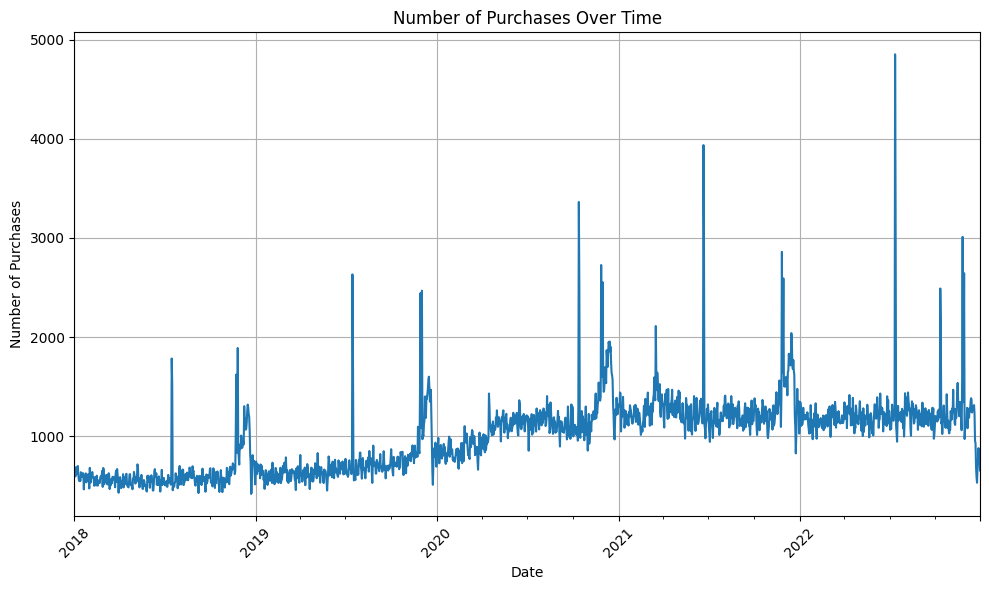

In [5]:
purchase_counts = purchases.groupby(purchases['Order Date'].dt.to_period('D')).size()

plt.figure(figsize=(10, 6))
purchase_counts.plot()
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()